<a href="https://colab.research.google.com/github/Ann-Bond-coder/Artificial-intelligence/blob/main/Bondarenko_AI(lab8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Виуонати імпорт необхідних бібліотек та завантажити набір данних
import pandas as pd
import numpy as np
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, log_loss, f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# 2.Підключити базу даних та вивести перші 5 рядків та розмір отриманного датафрейму
drive.mount('/content/drive')
original_path = '/content/drive/MyDrive/Colab Notebooks/data/creditcard.csv'
data = pd.read_csv(original_path)
print('Розмір датафрейму - ', data.shape)
data.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Розмір датафрейму -  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 3. Перевірити наявність пропущених даних в наборі
data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
# 4. Вивести загальні характеристику набору
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# 5. Виконати перетворення типу даних останнього стовбця з числового в логічний. Перевірити отриманий результат
data['Class'] = data['Class'].astype(bool)
data['Class'].dtype

dtype('bool')

False    284315
True        492
Name: Class, dtype: int64


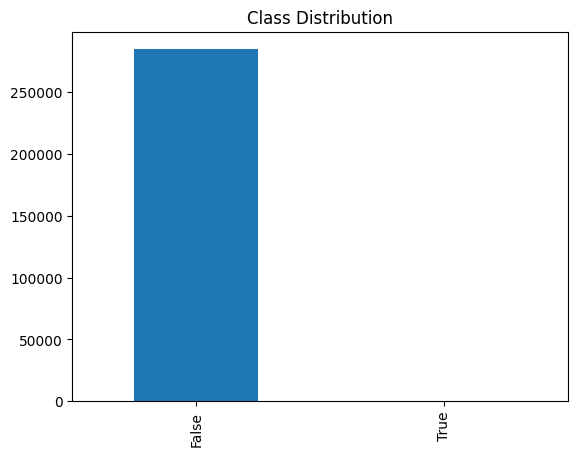

In [ ]:
# 6. За допомогою метода value_counts() розрахувати та виконати візуалізацію розподілу классів:
# кількість транзакцій з картами, які були ідентифіковані як "fraud"(шахрайство) та кількість звичайних (допустимих) транзакцій
class_counts = data['Class'].value_counts()
print(class_counts)

class_counts.plot(kind='bar', title='Class Distribution')
plt.show()

In [ ]:
# 7. Виконати Feature Scaling: провести стандартизацію характеристики 'Amount' за допомогою
# классу StandardScaler бібліотеки sklearn
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,False


In [ ]:
# 8. Виділити набір незалежних змінних(Х). Призначити стовбець "Class" в якості цільової змінної
# classes (target variable, y). Вивести перші 5 рядків
x=data.iloc[:,:-1]
y=data["Class"]
print(x.head(5))
print("")
print(y.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [ ]:
# 9. Видалити стовбець "Time" з Х
x = x.drop('Time', axis=1)

In [ ]:
# 10. Провести розподіл датасету на навчальну та тестову множину
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 29)
(56962, 29)
(227845,)
(56962,)


In [ ]:
# 11. Провести навчання моделі класифікації (парні варіанти - алгоритм KNeighborsClassifier, 
# непарні варіанти - алгоритм LogisticRegression)
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# 12. Виконати классифікацію (прогнозування) тестової частини датасету
y_pred = classifier.predict(x_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# 13. Побудувати на основі отриманих результатів Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[56863,     9],
       [   20,    70]])

In [ ]:
# 14. Вивести значення метрик Precision, Recall, Accuracy, F-міри та Log Loss
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(log_loss(y_test, y_pred))

0.8860759493670886
0.7777777777777778
0.9994908886626171
0.8284023668639053
0.018350232581096346


In [ ]:
# 15. Вивести classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56872
        True       0.89      0.78      0.83        90

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

